In [1]:
%pylab inline
import pandas as pd
import SpatialDE as sde

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_info = pd.read_csv('data/sample_info.csv', index_col=0)

In [6]:
df = pd.read_csv('data/GSE65785_clutchApolyA_relative_TPM.csv', index_col=0)
df = df[df.sum(1) >= 3]  # Filter practically unobserved genes
dfm = np.log10(df + 1).T

In [7]:
X = sample_info[['hpf']]

In [ ]:
results = sde.run(X, dfm)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.045s
INFO:root:Fitting gene models
INFO:root:Model 1 of 20
INFO:root:Model 2 of 20                                
INFO:root:Model 3 of 20                                
INFO:root:Model 4 of 20                                
INFO:root:Model 5 of 20                                
INFO:root:Model 6 of 20                                
INFO:root:Model 7 of 20                                
INFO:root:Model 8 of 20                                
INFO:root:Model 9 of 20                                
INFO:root:Model 10 of 20                               
INFO:root:Model 11 of 20                               
 58%|█████▊    | 12956/22262 [00:07<00:05, 1704.86it/s]

In [9]:
results.model.value_counts()

PER       20000
SE        20000
linear     2000
const      2000
Name: model, dtype: int64

In [10]:
null_lls = results.query('model == "const"')[['g', 'max_ll']]

In [11]:
bic_results = results[results.groupby(['g'])['BIC'].transform(min) == results['BIC']]

In [12]:
bic_results.head()

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC
35,1012073389|,inf,240.997286,0.006560,0.0,90,0.0,NaN,2,const,-472.994953
43,1012074611|,inf,273.430110,0.001724,0.0,90,0.0,NaN,2,const,-537.860601
99,1012097508|,inf,133.241529,0.115326,0.0,90,0.0,NaN,2,const,-257.483439
108,1012104594|,inf,232.897215,0.009797,0.0,90,0.0,NaN,2,const,-456.794810
147,ERCC-00024|,inf,119.141428,0.035702,0.0,90,0.0,NaN,2,const,-229.283237


In [13]:
final = bic_results.merge(null_lls, on='g',)

In [14]:
final.head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y
0,1012073389|,inf,240.997286,0.006560,0.0,90,0.0,NaN,2,const,-472.994953,240.997286
1,1012074611|,inf,273.430110,0.001724,0.0,90,0.0,NaN,2,const,-537.860601,273.430110
2,1012097508|,inf,133.241529,0.115326,0.0,90,0.0,NaN,2,const,-257.483439,133.241529
3,1012104594|,inf,232.897215,0.009797,0.0,90,0.0,NaN,2,const,-456.794810,232.897215
4,ERCC-00024|,inf,119.141428,0.035702,0.0,90,0.0,NaN,2,const,-229.283237,119.141428


In [15]:
final['D'] = final['max_ll_x'] - final['max_ll_y']

In [16]:
final.query('model == "PER"').sort_values('D', ascending=False)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
1973,1012078795|,0.022111,122.756250,0.607164,9.738866,90,0.001279,100.000000,4,PER,-227.513261,-42.096913,164.853163
1992,Xetro.A01355|fam19a3,0.071562,101.383083,0.371215,1.183614,90,0.001361,100.000000,4,PER,-184.766926,-22.979417,124.362499
1985,Xetro.A00273|,0.104817,103.795023,0.331866,0.654251,90,0.000771,100.000000,4,PER,-189.590808,-8.954106,112.749129
1998,Xetro.A01452|,0.126653,184.631582,0.110431,0.062230,90,0.000768,100.000000,4,PER,-351.263926,86.408072,98.223510
1990,Xetro.A01046|pes1,0.226753,108.953552,2.106996,11.332100,90,0.000664,100.000000,4,PER,-199.907866,32.284141,76.669411
1991,Xetro.A01047|,0.187667,112.033302,1.982016,12.107530,90,0.000844,100.000000,4,PER,-206.067366,35.466017,76.567286
1994,Xetro.A01368|,0.228212,86.887946,0.249083,0.190201,90,0.000680,100.000000,4,PER,-155.776654,10.911656,75.976290
1996,Xetro.A01402|,0.229960,135.358888,0.135985,0.057661,90,0.000667,100.000000,4,PER,-252.718538,60.915700,74.443189
1993,Xetro.A01358|ppm1j,0.379334,172.153807,0.083912,0.013788,90,0.000504,100.000000,4,PER,-326.308375,109.260463,62.893344
1982,ERCC-00160|,0.322633,78.948808,0.708778,0.929554,90,0.000596,100.000000,4,PER,-139.898377,18.108889,60.839919


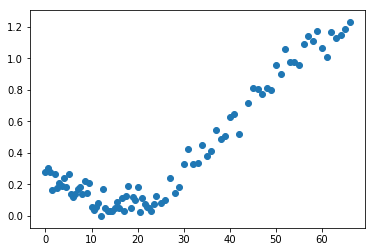

In [17]:
plt.scatter(X, dfm['1012078795|'])

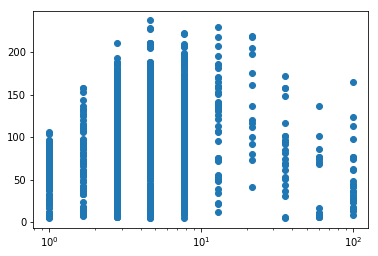

In [501]:
figsize(6, 4)
plt.scatter(final.l, final.D);
plt.xscale('log');

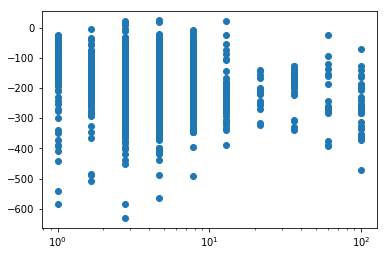

In [502]:
plt.scatter(final.l, final.BIC);
plt.xscale('log');

In [319]:
final.query('model == "linear"').shape

(65, 13)

In [334]:
final.query('model == "linear"').sort_values('D', ascending=False).head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
374,Xetro.A01710|,44.862334,122.488089,-0.019390,0.000082,90,0.000651,NaN,3,linear,-231.476748,21.301597,101.186492
362,Xetro.A01136|,44.984842,101.678733,-0.077032,0.000169,90,0.000648,NaN,3,linear,-189.858036,0.610151,101.068581
369,Xetro.A01440|,46.280925,80.810164,-0.031029,0.000200,90,0.000717,NaN,3,linear,-148.120899,-14.748238,95.558402
363,Xetro.A01228|trem2,51.879859,123.504638,-0.053195,0.000085,90,0.000666,NaN,3,linear,-233.509846,28.550406,94.954231
348,Xetro.A00433|,61.295611,41.670829,-0.108522,0.000413,90,0.000722,NaN,3,linear,-69.842229,-43.141049,84.811878


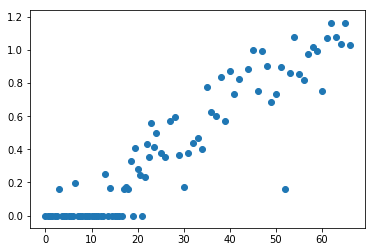

In [337]:
plt.scatter(X, dfm['Xetro.A00433|'])

In [128]:
final.query('D > 150').sort_values('l')

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
498,1012073524|,0.007677,39.367350,0.446663,0.399615,90,0.000566,1.847850,4,SE,-60.735461,-121.000048,160.367398
523,Xetro.A00413|egflam,0.007589,90.736780,1.116542,0.328745,90,0.000531,1.847850,4,SE,-163.474320,-69.729012,160.465792
531,Xetro.A00602|xbp1,0.006211,79.174649,2.165780,0.964264,90,0.000545,1.847850,4,SE,-140.350060,-74.676190,153.850839
565,Xetro.A01542|efs,0.007986,91.724676,1.369571,0.429634,90,0.000535,1.847850,4,SE,-165.450113,-68.048957,159.773632
729,Xetro.A01100|slc12a3.2,0.012947,51.852927,1.127850,0.471049,90,0.000530,2.511886,4,SE,-85.706615,-104.639463,156.492390
727,Xetro.A01061|aplnr,0.008592,65.859332,1.777150,0.698564,90,0.000605,2.511886,4,SE,-113.719424,-90.811566,156.670898
721,Xetro.A01017|rasal1,0.006794,132.009294,0.849075,0.171080,90,0.000542,2.511886,4,SE,-246.019349,-51.512963,183.522257
719,Xetro.A01011|,0.009046,33.092917,2.298434,1.266023,90,0.000623,2.511886,4,SE,-48.186596,-141.237297,174.330214
696,Xetro.A00857|crkl,0.007103,157.257631,2.066553,0.589608,90,0.000542,2.511886,4,SE,-296.516023,-19.452443,176.710074
698,Xetro.A00887|eif4enif1,0.004267,141.356930,1.629857,0.426460,90,0.000530,2.511886,4,SE,-264.714621,-22.891042,164.247972


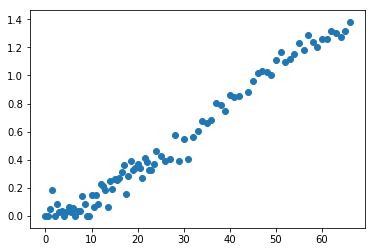

In [130]:
plt.scatter(X, dfm['Xetro.A00852|unnamed'])

In [117]:
final.sort_values('BIC').replace(np.inf, np.nan).dropna().head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
872,Xetro.A00042|,1.079258,324.651211,0.002859,0.000030,90,0.000321,3.414549,4,SE,-631.303182,314.248478,10.402733
597,Xetro.A00038|,3.667350,301.457157,0.003469,0.000018,90,0.000390,2.511886,4,SE,-584.915075,295.513371,5.943786
461,Xetro.A01380|,0.000045,301.115502,0.004311,0.000799,90,0.000394,1.000000,4,SE,-584.231766,233.335173,67.780329
1559,Xetro.A00324|,3.329285,291.379689,0.005069,0.000025,90,0.000414,6.309573,4,SE,-564.760140,286.024799,5.354890
448,Xetro.A01232|pgc,0.974739,279.118911,0.004108,0.000075,90,0.000322,1.000000,4,SE,-540.238583,267.066620,12.052292


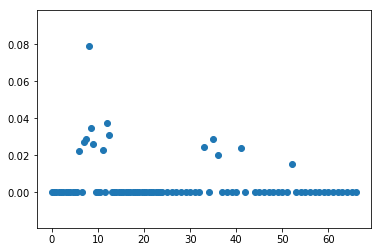

In [119]:
plt.scatter(X, dfm['Xetro.A01232|pgc'])

In [120]:
final.sort_values('BIC').replace(np.inf, np.nan).dropna().head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
872,Xetro.A00042|,1.079258,324.651211,0.002859,0.000030,90,0.000321,3.414549,4,SE,-631.303182,314.248478,10.402733
597,Xetro.A00038|,3.667350,301.457157,0.003469,0.000018,90,0.000390,2.511886,4,SE,-584.915075,295.513371,5.943786
461,Xetro.A01380|,0.000045,301.115502,0.004311,0.000799,90,0.000394,1.000000,4,SE,-584.231766,233.335173,67.780329
1559,Xetro.A00324|,3.329285,291.379689,0.005069,0.000025,90,0.000414,6.309573,4,SE,-564.760140,286.024799,5.354890
448,Xetro.A01232|pgc,0.974739,279.118911,0.004108,0.000075,90,0.000322,1.000000,4,SE,-540.238583,267.066620,12.052292


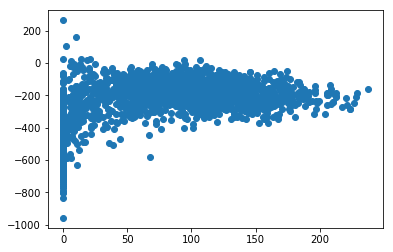

In [121]:
plt.scatter(final.D, final.BIC);

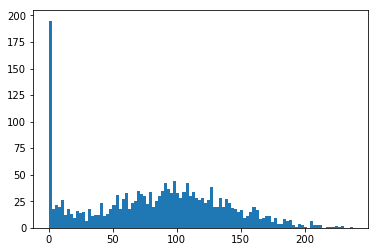

In [465]:
h, _, _ = plt.hist(final.D.replace(np.inf, np.nan).dropna(), bins=100)

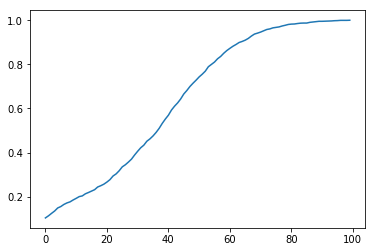

In [470]:
plt.plot(h.cumsum() / h.sum());

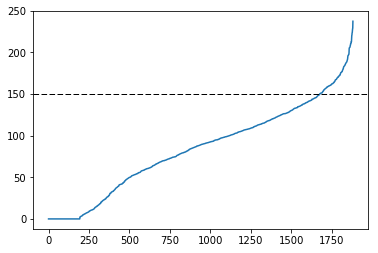

In [228]:
tmp = final.D.replace(np.inf, np.nan).dropna()
plt.plot(np.arange(tmp.shape[0]), tmp.sort_values());
plt.axhline(150, c='k', lw=1, ls='--');

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
1060,Xetro.A00907|gatc,0.024089,168.650427,2.275404,0.517273,90,0.00046,3.414549,4,SE,-319.301615,31.344893,137.305534


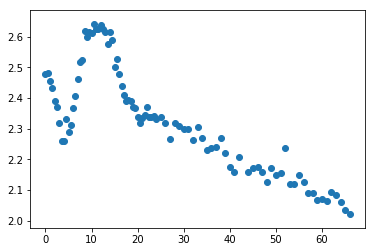

In [449]:
figsize(6, 4)
s = dfm.sample(1, axis=1).iloc[:, 0]
plt.scatter(X, s);
final.query('g == "{}"'.format(s.name))

In [241]:
idx = tmp[tmp.sort_values() > 150].index

In [251]:
peak_times = pd.Series(dfm.iloc[:, idx].as_matrix().argmax(0), index=idx)

In [253]:
peak_times = peak_times.sort_values()

In [340]:
from sklearn.preprocessing import minmax_scale

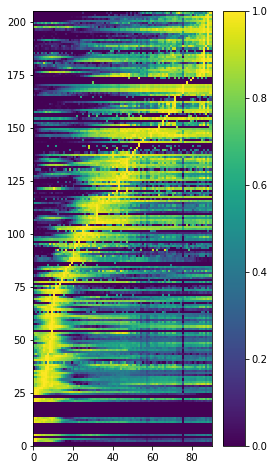

In [343]:
figsize(4, 8)
plt.pcolormesh(minmax_scale(dfm.iloc[:, peak_times.index].T, axis=1));
plt.colorbar();

In [458]:
final.query('D > 150').sort_values('l').head(20)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
498,1012073524|,0.007677,39.367350,0.446663,0.399615,90,0.000566,1.847850,4,SE,-60.735461,-121.000048,160.367398
523,Xetro.A00413|egflam,0.007589,90.736780,1.116542,0.328745,90,0.000531,1.847850,4,SE,-163.474320,-69.729012,160.465792
531,Xetro.A00602|xbp1,0.006211,79.174649,2.165780,0.964264,90,0.000545,1.847850,4,SE,-140.350060,-74.676190,153.850839
565,Xetro.A01542|efs,0.007986,91.724676,1.369571,0.429634,90,0.000535,1.847850,4,SE,-165.450113,-68.048957,159.773632
729,Xetro.A01100|slc12a3.2,0.012947,51.852927,1.127850,0.471049,90,0.000530,2.511886,4,SE,-85.706615,-104.639463,156.492390
727,Xetro.A01061|aplnr,0.008592,65.859332,1.777150,0.698564,90,0.000605,2.511886,4,SE,-113.719424,-90.811566,156.670898
721,Xetro.A01017|rasal1,0.006794,132.009294,0.849075,0.171080,90,0.000542,2.511886,4,SE,-246.019349,-51.512963,183.522257
719,Xetro.A01011|,0.009046,33.092917,2.298434,1.266023,90,0.000623,2.511886,4,SE,-48.186596,-141.237297,174.330214
696,Xetro.A00857|crkl,0.007103,157.257631,2.066553,0.589608,90,0.000542,2.511886,4,SE,-296.516023,-19.452443,176.710074
698,Xetro.A00887|eif4enif1,0.004267,141.356930,1.629857,0.426460,90,0.000530,2.511886,4,SE,-264.714621,-22.891042,164.247972


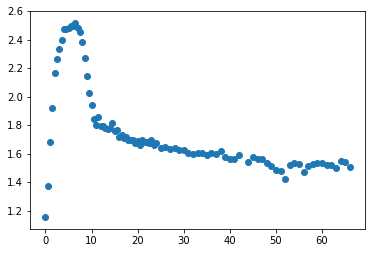

In [459]:
plt.scatter(X, dfm['Xetro.A00887|eif4enif1'])